In [50]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [1]:
# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate City List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

##  Perform API Calls
    - Perform a weather check on each city using a series of successive API calls.
    - Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Tasiilaq
Processing Record 2 | Lebu
City not found. Skipping...
Processing Record 3 | Mataura
Processing Record 4 | Bredasdorp
Processing Record 5 | Rikitea
Processing Record 6 | Kenora
Processing Record 7 | Salalah
Processing Record 8 | Barcelos
Processing Record 9 | Quixeramobim
Processing Record 10 | Port Elizabeth
Processing Record 11 | Saint Paul Harbor
Processing Record 12 | Geraldton
Processing Record 13 | Constitución
Processing Record 14 | Bonavista
Processing Record 15 | Butaritari
Processing Record 16 | Sechura
City not found. Skipping...
Processing Record 17 | Atuona
Processing Record 18 | São João da Barra
Processing Record 19 | Tuktoyaktuk
Processing Record 20 | Sabang
Processing Record 21 | Ushuaia
Processing Record 22 | Cranbourne
Processing Record 23 | Hermanus
Processing Record 24 | Bahía Honda
Processing Record 25 | Aden
Processing Record 26 | Clyde River
Processing Record 27 | Fairbanks
P

Processing Record 232 | Bouza
Processing Record 233 | Cherskiy
Processing Record 234 | Emerald
Processing Record 235 | Garoowe
Processing Record 236 | Haileybury
Processing Record 237 | Verkh-Usugli
Processing Record 238 | Nanortalik
Processing Record 239 | Sistranda
Processing Record 240 | Mossendjo
Processing Record 241 | Provideniya
Processing Record 242 | Diok’nisi
Processing Record 243 | Guiyang
Processing Record 244 | Malbork
Processing Record 245 | Tiverton
Processing Record 246 | Souillac
City not found. Skipping...
Processing Record 247 | Port Blair
Processing Record 248 | Hithadhoo
Processing Record 249 | San Patricio
Processing Record 250 | Hurghada
Processing Record 251 | Matara
Processing Record 252 | Chulumani
Processing Record 253 | Bartica
Processing Record 254 | Vysokogornyy
Processing Record 255 | Conde
Processing Record 256 | Maridi
Processing Record 257 | Chabahar
Processing Record 258 | Yertsevo
City not found. Skipping...
Processing Record 259 | Egvekinot
Processi

Processing Record 468 | Paamiut
Processing Record 469 | Mikuni
Processing Record 470 | Lewistown
Processing Record 471 | Puerto Nariño
Processing Record 472 | Springfield
Processing Record 473 | Muscat
Processing Record 474 | Laguna
City not found. Skipping...
Processing Record 475 | Nouakchott
Processing Record 476 | Dunkirk
Processing Record 477 | Yumen
City not found. Skipping...
Processing Record 478 | The Valley
Processing Record 479 | Richards Bay
Processing Record 480 | Molepolole
Processing Record 481 | Larsnes
Processing Record 482 | Zandvoort
Processing Record 483 | Port Hawkesbury
Processing Record 484 | Psebay
Processing Record 485 | Rocha
Processing Record 486 | Gaza
Processing Record 487 | Tautira
Processing Record 488 | Knysna
Processing Record 489 | Tura
Processing Record 490 | Victor Harbor
Processing Record 491 | Alyangula
Processing Record 492 | Hofn
Processing Record 493 | Naze
Processing Record 494 | Gīdolē
City not found. Skipping...
Processing Record 495 | Qiongs

##  Convert Raw Data to DataFrame
    - Export the city data into a .csv.
    - Display the DataFrame

In [9]:
# create data frame
weather_df = pd.DataFrame({ "City" : city_name ,
              "Latitude" : latitude,
              "Longtitude" : longitude,
              "Max Temp" : max_temperature,
              "Humidity" : humidity,
              "Cloudiness" : cloudiness,
              "Wind Speed" : wind_speed,
              "Country" : country,
              "Date" : date
}) 
weather_df.head()

,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,32.16,96,100,9.86,GL,1636601351
1,Lebu,-37.6167,-73.6500,51.62,92,91,7.20,CL,1636601351
2,Mataura,-46.1927,168.8643,75.83,42,100,4.99,NZ,1636601256
3,Bredasdorp,-34.5322,20.0403,60.12,88,55,4.61,ZA,1636601352
4,Rikitea,-23.1203,-134.9692,73.89,82,86,14.81,PF,1636601352


In [13]:
# Export the city data into a .csv
weather_df.to_csv("weather_data.csv")

In [14]:
weather_df.describe()

,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.314453,18.911147,57.012819,72.371634,58.919210,7.445099,1.636601e+09
std,32.957796,89.005858,23.327957,19.685206,38.713933,5.799855,2.106547e+02
min,-54.800000,-179.166700,-25.800000,1.000000,0.000000,0.000000,1.636601e+09
25%,-8.103000,-57.679200,41.580000,62.000000,20.000000,3.310000,1.636601e+09
50%,22.903600,21.286900,62.510000,75.000000,74.000000,5.860000,1.636601e+09
75%,46.358000,97.522800,76.460000,88.000000,97.000000,9.800000,1.636601e+09
max,78.218600,179.316700,98.580000,100.000000,100.000000,37.980000,1.636602e+09


##   Plotting the Data
###  Latitude vs. Temperature Plot

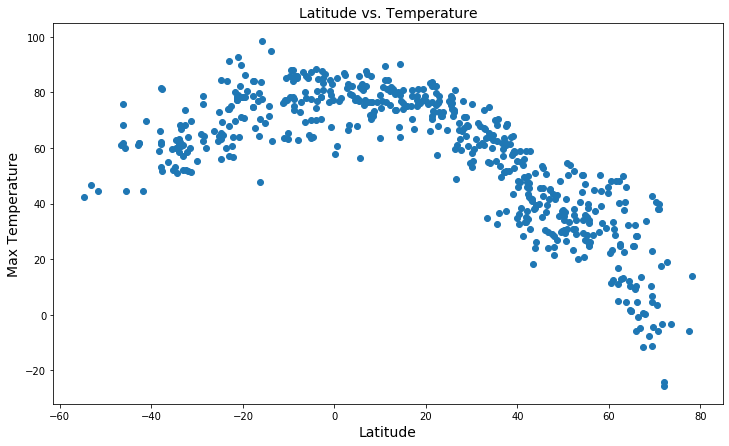

In [40]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker = "o")
plt.title("Latitude vs. Temperature", fontsize =14)
plt.xlabel("Latitude",fontsize =14)
plt.ylabel("Max Temperature",fontsize =14)
plt.rcParams["figure.figsize"] = (12,7)
plt.savefig("Images/Latitude vs Max Temperature.png")
plt.show()

###  Latitude vs. Humidity Plot

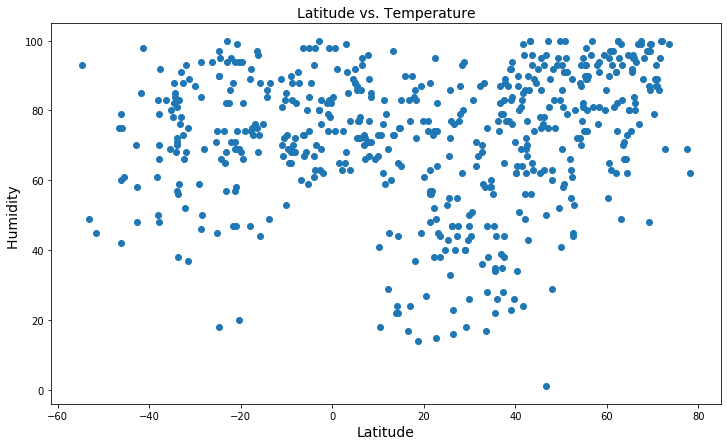

In [43]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o")
plt.title("Latitude vs. Temperature", fontsize =14)
plt.xlabel("Latitude",fontsize =14)
plt.ylabel("Humidity ",fontsize =14)
plt.rcParams["figure.figsize"] = (12,7)
plt.savefig("Images/Latitude vs Humidity .png")
plt.show()

###  Latitude vs. Cloudiness Plot

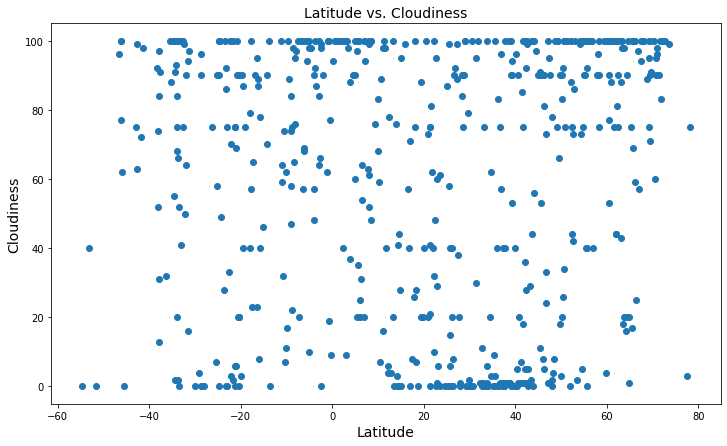

In [44]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o")
plt.title("Latitude vs. Cloudiness", fontsize =14)
plt.xlabel("Latitude",fontsize =14)
plt.ylabel("Cloudiness",fontsize =14)
plt.rcParams["figure.figsize"] = (12,7)
plt.savefig("Images/Latitude vs Cloudiness .png")
plt.show()

###  Latitude vs. Wind Speed Plot

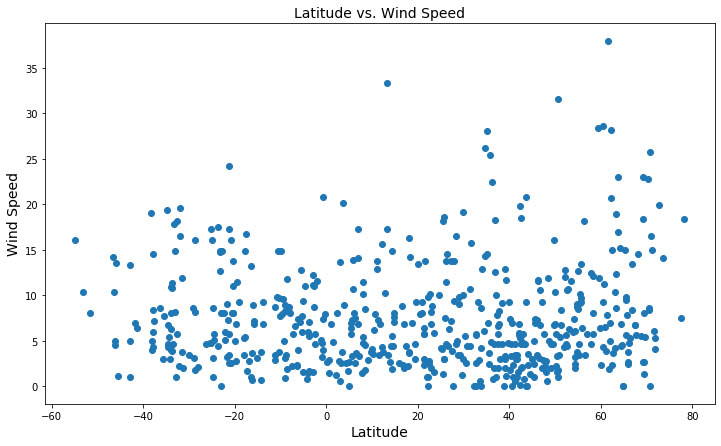

In [45]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o")
plt.title("Latitude vs. Wind Speed", fontsize =14)
plt.xlabel("Latitude",fontsize =14)
plt.ylabel("Wind Speed",fontsize =14)
plt.rcParams["figure.figsize"] = (12,7)
plt.savefig("Images/Latitude vs Wind Speed .png")
plt.show()

## Linear Regression

### Northern Hemisphere - Temperature (F) vs. Latitude Linear Rgression

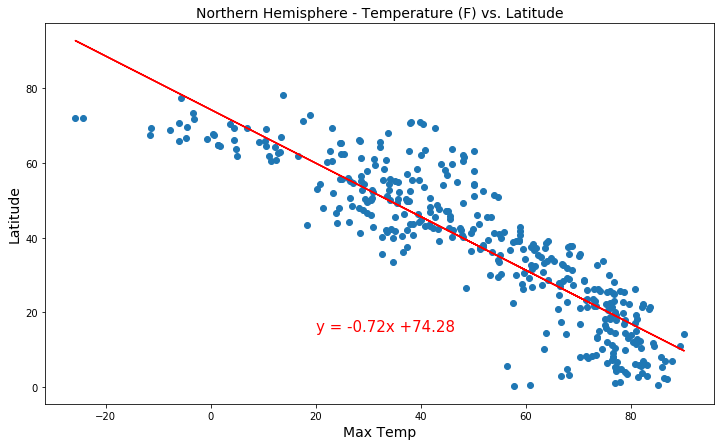

y = -0.72x +74.28
r-value is -0.8815793574898896


In [68]:
# extract value in north hemisphere region
north_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]

x_value = north_hemisphere["Max Temp"]
y_value = north_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

# linear regression formula
regres_value = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# scatter plot with linear regression line
plt.scatter(x_value, y_value, marker = "o")
plt.plot(x_value, regres_value,'r-')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.rcParams["figure.figsize"] = (12,7)
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude", fontsize =14)
plt.xlabel("Max Temp",fontsize =14)
plt.ylabel("Latitude",fontsize =14)
plt.savefig("Images/north_hemisphere.png")
plt.show()

print(line_eq)
print(f"r-value is {rvalue}")

### Southern Hemisphere - Temperature (F) vs. Latitude Linear Rgression

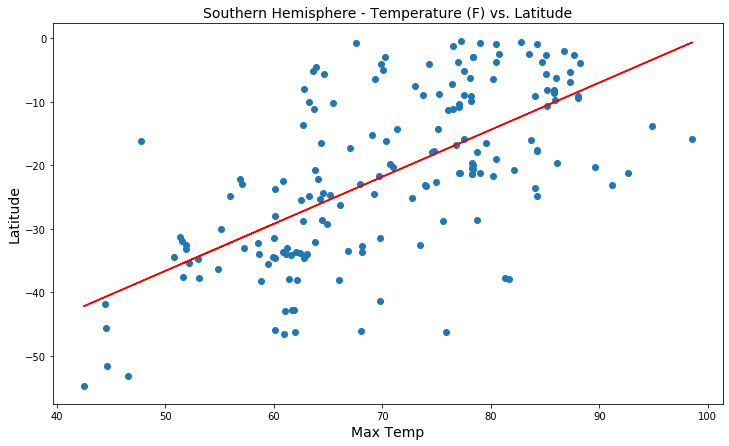

y = 0.74x +-73.62
r-value is 0.6461412717354672


In [74]:
# extract value in north hemisphere region
south_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

x_value = south_hemisphere["Max Temp"]
y_value = south_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

# linear regression formula
regres_value = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# scatter plot with linear regression line
plt.scatter(x_value, y_value, marker = "o")
plt.plot(x_value, regres_value,'r-')
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude", fontsize =14)
plt.xlabel("Max Temp",fontsize =14)
plt.ylabel("Latitude",fontsize =14)
plt.savefig("Images/south_hemisphere.png")
plt.show()


print(line_eq)
print(f"r-value is {rvalue}")